## 2-2. アダマールテスト

最も簡単な量子アルゴリズムとして、アダマールテストとよばれる以下のような量子回路（図1）を考える。つまり、第1ビットは$|0\rangle$に、第2ビット以降は状態$|\psi\rangle$に初期化されていて、まず第1ビットにアダマールゲートをかける。そして、全体に制御ユニタリ演算子$\Lambda(U)$（後述）を作用させ、再び第1ビットにアダマールゲートをかけて、最後にその第1ビットを測定する。
![図1](figs/2/Hadamard_test.png)

ここで制御ユニタリ演算子$\Lambda(U)$というのは、第1量子ビットが$|0\rangle$の場合にはなにもせず、$|1\rangle$の場合には$U$を作用させるユニタリ演算である。

$$
\Lambda (U) = |0\rangle \langle 0| \otimes I + |1\rangle \langle 1|  \otimes U.
$$

つまり、１つ目の量子ビットが$|0\rangle$か$|1\rangle$かによって条件分岐して、「なにもしない」または「$U$を作用させる」という演算が実行される。従来のコンピュータでは条件分岐は同時に実行することができないが、量子コンピュータでは状態の重ね合わせを利用して、条件分岐を**同時並列的に実行することができる**。

このアダマールテストの動作について考えていく。最初は簡単のために、量子状態$|\psi \rangle$が
ユニタリー演算（行列）$U$の固有値$e^{i \lambda}$の固有状態（固有ベクトル）である場合を考える：
\begin{eqnarray}
U|\psi \rangle = e^{i \lambda} |\psi\rangle.
\end{eqnarray}

１つ目の量子ビットにアダマール演算$H$を作用させることで
\begin{eqnarray}
\frac{1}{\sqrt{2}} (|0\rangle  + |1\rangle) \otimes |\psi  \rangle 
\end{eqnarray}
が得られる。
その後、制御$U$演算を作用させることによって、
**固有値**$e^{i\lambda}$**が１つめの量子ビットの相対位相として得られる**（このことを**位相キックバック**と呼ぶ）:
\begin{eqnarray}
&&\frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi  \rangle  
+ |1\rangle \otimes U|\psi \rangle )
\\
&=&\frac{1}{\sqrt{2}} (|0\rangle \otimes |\psi  \rangle  
+e^{i \lambda} |1\rangle \otimes |\psi \rangle )
\\
&=&
\frac{1}{\sqrt{2}} (|0\rangle   
+e^{i \lambda} |1\rangle )\otimes |\psi  \rangle.
\end{eqnarray}
最後に、１つ目の量子ビットに再度アダマール演算を行い
\begin{eqnarray}
\left(\frac{1+e^{i\lambda}}{2}|0\rangle  
+\frac{1-e^{i\lambda}}{2} |1\rangle \right)\otimes |\psi  \rangle 
\label{eq01}
\end{eqnarray}
が得られる。
１つ目の量子ビットを測定すると測定結果$m=0,1$を得る確率は
\begin{eqnarray}
p_{m}=\left|\frac{1+(-1)^m e^{i\lambda}}{2}\right|^2 =\frac{1+(-1)^m \cos \lambda}{2}
\end{eqnarray}
となる。
$|\psi \rangle$、$U$、$\langle \psi |$は
それぞれ$2^n$次元の列ベクトル、$2^n \times 2^n$行列、
$2^n$次元の行ベクトルなので、
このアダマールテストを古典コンピュータ上で愚直に計算すると
指数的に大きなメモリーの確保と演算回数が必要になる。
一方で、量子コンピューターでは、
確率分布$p_m$のもとで$m$がサンプルされる。
$\cos \lambda$を
ある誤差$\epsilon$で推定したい場合は、
その逆数$1/\epsilon$の多項式回程度サンプルすればよいことになる。

同じ計算を、必ずしも固有ベクトルとは限らない、一般の入力に対して行うと、測定前の状態は、

$$
 |0\rangle \frac{I+U}{2} |\psi \rangle  +  |1\rangle  \frac{I-U}{2} |\psi \rangle 
$$

となり、0もしくは1が得られる確率は、

\begin{align}
p_0 &= \frac{1+ {\rm Re} \langle \psi | U | \psi \rangle }{2} \\
p_1 &= \frac{1- {\rm Re} \langle \psi | U | \psi \rangle }{2} \tag{1}
\end{align}

となる。つまり、量子コンピュータ上でアダマールテストを実行すれば、その測定結果のサンプル平均をとることで**ベクトル**$|\psi \rangle$**でユニタリ行列**$U$**を挟んだ値を推定することができる**。同じ値を古典コンピュータで求めようとした場合、量子ビット数$n$が大きくなるにつれベクトルや行列の次元は指数的に大きくなるので、指数的な時間を要する。

なお、１つ目の量子ビットを測定した後の、２つ目の量子ビットの状態は、測定結果$m = 0, 1$に応じて以下の状態になる（規格化因子は省略）：

$$
|\psi_0\rangle = \frac{I + U}{2}|\psi\rangle,
\quad
|\psi_1\rangle = \frac{I - U}{2}|\psi\rangle.
$$

ここで、$U$が１量子ビットのユニタリ演算で、かつその固有値が$\pm 1$であるような場合を考える。固有値$\pm 1$に対応する固有ベクトル$|u_1\rangle$, $|u_{-1}\rangle$を使って$|\psi\rangle = c_1|u_1\rangle + c_2|u_2\rangle$と展開し代入することで、測定後の状態$|\psi_0\rangle$, $|\psi_1\rangle$はそれぞれ固有値$\pm 1$に対応する固有状態であることが分かる。固有値が$\pm 1$ではない場合も、アダマールテストの出力を入力として繰り返すと$U$の固有状態に状態が収束していく（興味のある人は、以下の例を参考にして試してもらいたい）。

### SymPyでの実装
具体的な例として、$U=H$（アダマールゲート）の場合を考えてみよう。補助量子ビットを$|0\rangle$、アダマールテストの入力$|\psi\rangle$も$|0\rangle$とする。

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [2]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax && window.google && window.google.colab) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [3]:
state = Qubit('00')

制御H演算は、`CGateS()`を用いて

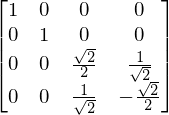

In [4]:
ctrlH = CGateS(1,H(0))
represent(ctrlH,nqubits=2)

と行列表示される。
測定前の状態は、

In [5]:
H(1)*ctrlH*H(1)*state

とかけるが、SymPyに計算させてみると

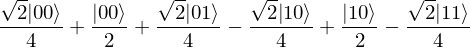

In [6]:
qapply(H(1)*ctrlH*H(1)*state)

となる。第１章で紹介したSymPyの`measure_partial`関数を用いて、1つ目の量子ビットの測定結果が0だった場合の量子状態と確率を求めると、

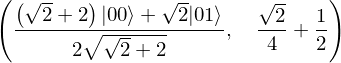

In [7]:
from sympy.physics.quantum.qubit import measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot
measured_state_and_probability_zero = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[0]
simplify(measured_state_and_probability_zero)

となる。$\langle 0 | H | 0\rangle = 1/\sqrt{2}$だから、測定確率が式(1)と一致していることが分かる。   
また、２つめの量子ビットに$H$を作用させてみると、測定後の状態が$H$の固有ベクトルになっていることが分かる（SymPyのインデックスは左から１つ目が1、２つ目が0になるよう対応させていることに注意）。

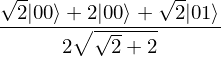

In [8]:
measured_state_zero = measured_state_and_probability_zero[0]
simplify(qapply(H(0)*measured_state_zero))

同様に1の測定結果を得た場合は、固有値−1の固有状態であることも確認できるので試してもらいたい。

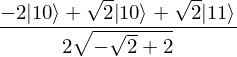

In [9]:
measured_state_one = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[1][0]
simplify(qapply(H(0)*measured_state_one))